# Computer Game Store Data Analysis

**Project goal: process video game sales data and identify patterns that determine a game's success**

**Data description:**
* Name — game title
* Platform — platform
* Year_of_Release — release year
* Genre — game genre
* NA_sales — sales in North America (millions of copies sold)
* EU_sales — sales in Europe (millions of copies sold)
* JP_sales — sales in Japan (millions of copies sold)
* Other_sales — sales in other countries (millions of copies sold)
* Critic_Score — critic score (max 100)
* User_Score — user score (max 10)
* Rating — ESRB rating (Entertainment Software Rating Board). This association determines the age rating for games.

In [75]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats as st

### Data loading

In [77]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [78]:
df.isna().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
NA_sales           False
EU_sales           False
JP_sales           False
Other_sales        False
Critic_Score        True
User_Score          True
Rating              True
dtype: bool

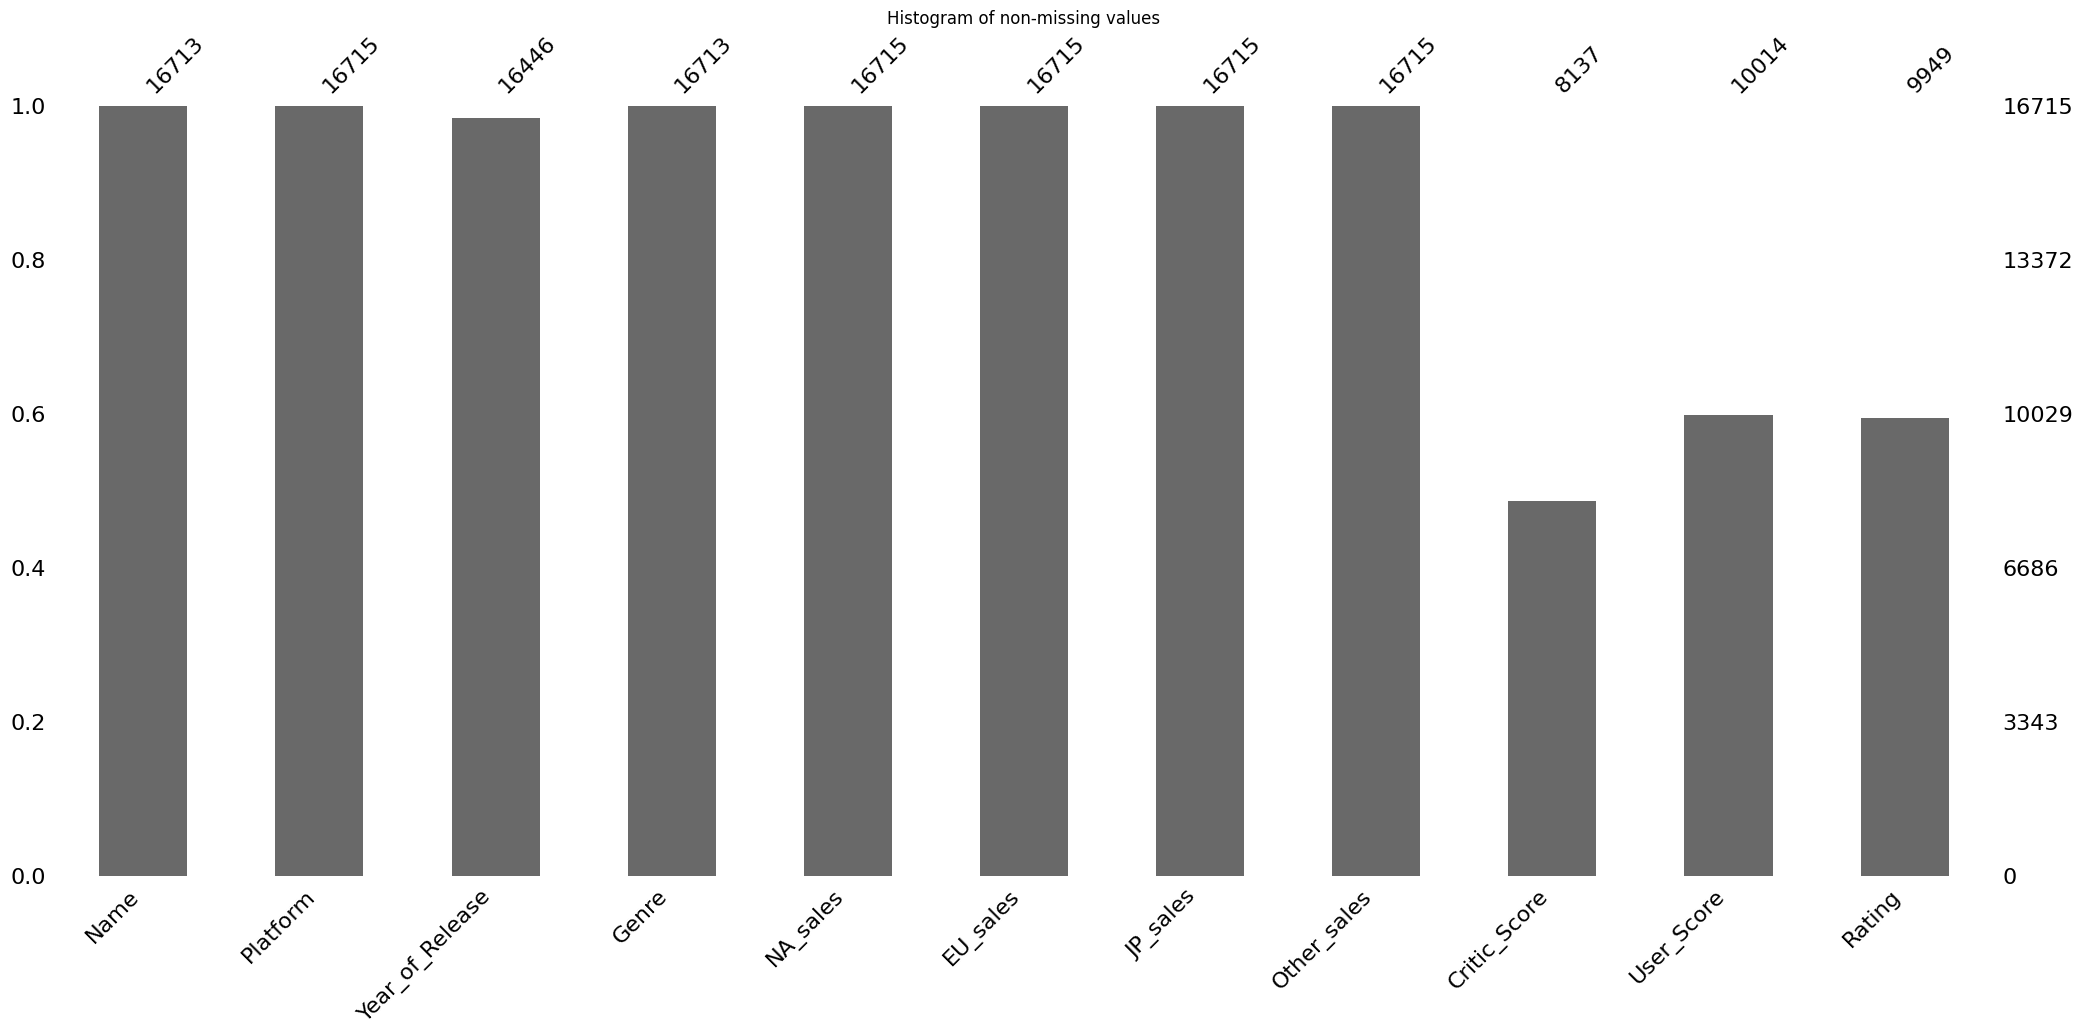

In [79]:
msno.bar(df)
plt.title("Histogram of non-missing values")
print()

**Columns: *Name, Year_of_Release, Critic_Score, User_Score, Rating* have missing values**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**The table contains 16715 records. Regional sales, release year, and critic scores are floats, other columns are strings. The release year should be converted to int, not datetime, since day/month are not provided and we don't need date operations. User ratings are strings because of 'tbd' values.**

### Data preprocessing

#### Column name case

In [81]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Handling missing values and changing data types

##### name & genre

In [82]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [83]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**These rows have no name or genre, and no critic/user scores, so we will drop them.**

In [84]:
df = df.dropna(subset=['name', 'genre'])

##### year_of_release

In [85]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**There are too many missing years to fill manually, but too few to ignore. We'll fill missing years with the mode for each game across platforms, and drop those that can't be filled.**

In [86]:
df.query('name == "LEGO Batman: The Videogame"') #example

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [87]:
df.loc[df['name'] == "LEGO Batman: The Videogame", 'year_of_release']

397      2008.0
456         NaN
460      2008.0
1519     2008.0
1538        NaN
1553     2008.0
12465    2008.0
Name: year_of_release, dtype: float64

In [88]:
list_nan_years = df[df['year_of_release'].isna()]['name'].unique()
for name in list_nan_years:
    if not df.loc[df['name'] == name]['year_of_release'].isna().all():
        mode_year = df.loc[df['name'] == name, 'year_of_release'].mode()
        df.loc[df['name'] == name, 'year_of_release'] = df.loc[df['name'] == name, 'year_of_release'].fillna(mode_year.values[0])
df[df['year_of_release'].isna()]    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [89]:
df.query('name == "wwe Smackdown vs. Raw 2006"') #check that remaining values can't be filled

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [90]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int32')
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### critic_score

In [91]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**We'll leave missing critic scores as is, since they are too many to fill.**

##### user_score

In [92]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Same as critic scores, we'll leave missing user scores.**

In [93]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


**TBD means "to be determined", likely due to too few user reviews. We'll replace 'tbd' with NaN.**

In [94]:
df[df['user_score'].isna()].shape[0] + df[df['user_score'] == 'tbd'].shape[0]

9027

In [95]:
df['user_score'] = df['user_score'].replace(to_replace='tbd', value=np.nan)
df['user_score'] = df['user_score'].astype('float')
df[df['user_score'].isna()].shape[0] #check size

9027

##### rating

In [96]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**We'll leave missing ESRB ratings, as we can't determine them ourselves.**

#### Duplicate handling

In [97]:
df.duplicated().sum() #no duplicates found

0

#### Add column for total sales

In [98]:
df['sales_sum'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Exploratory data analysis

#### Game releases by year

In [99]:
df.groupby('year_of_release')['year_of_release'].count().sort_values(ascending=False)

year_of_release
2008    1441
2009    1430
2010    1270
2007    1202
2011    1153
2006    1019
2005     948
2002     845
2003     783
2004     764
2012     662
2015     606
2014     581
2013     548
2016     502
2001     486
1998     379
2000     351
1999     339
1997     289
1996     263
1995     219
1994     122
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

**We can't judge the importance of a year by number of releases alone, we should also consider sales. Let's create a pivot table.**

In [100]:
years_sales = pd.pivot_table(df, values='sales_sum', index='year_of_release', aggfunc=['count', 'sum'])
years_sales.columns = ['count', 'sum']
years_sales.sort_values(by='year_of_release', ascending=False)

,count,sum
year_of_release,,
2016,502,129.94
2015,606,267.98
2014,581,331.53
2013,548,362.11
2012,662,360.52
2011,1153,510.59
2010,1270,595.61
2009,1430,659.51
2008,1441,681.24


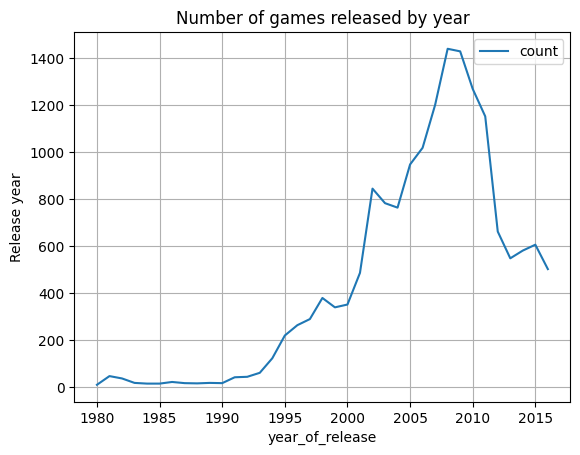

In [101]:
years_sales.plot(y='count', title='Number of games released by year', ylabel='Release year',grid=True)
print()

**For market analysis, let's use data after 2000, as earlier years have fewer games and are less relevant for modern trends.**

#### Sales by platform

In [102]:
platform_sales = pd.pivot_table(df, values='sales_sum', index=['platform', 'year_of_release'], aggfunc='sum')
platform_sales.reset_index() 

,platform,year_of_release,sales_sum
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
238,XB,2008,0.18
239,XOne,2013,18.96
240,XOne,2014,54.07
241,XOne,2015,60.14


,platform,platform_total_sum
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


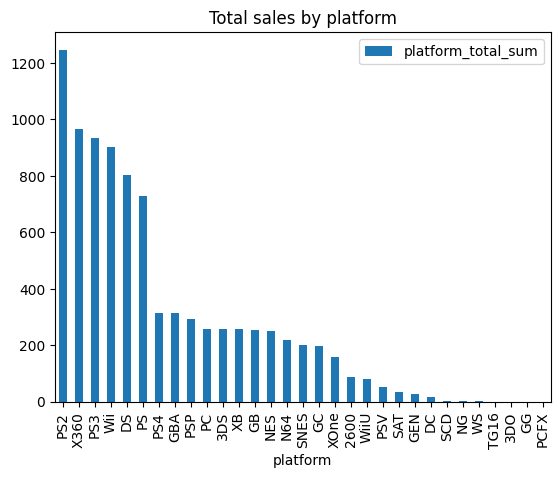

In [103]:
platform_sales_sum = platform_sales.groupby('platform').sum().sort_values(by='sales_sum', ascending=False)
platform_sales_sum.columns = ['platform_total_sum']
platform_sales_sum.plot(kind='bar')
plt.title('Total sales by platform')
platform_sales_sum.reset_index()

In [104]:
platform_sales = platform_sales.join(platform_sales_sum, on='platform', how='left').reset_index()
platform_sales

,platform,year_of_release,sales_sum,platform_total_sum
0,2600,1980,11.38,89.01
1,2600,1981,35.68,89.01
2,2600,1982,28.88,89.01
3,2600,1983,5.84,89.01
4,2600,1984,0.27,89.01
...,...,...,...,...
238,XB,2008,0.18,256.69
239,XOne,2013,18.96,159.32
240,XOne,2014,54.07,159.32
241,XOne,2015,60.14,159.32


*The pivot table shows yearly and total sales for each platform.*

**Let's select the top 10 platforms by sales and plot their yearly sales.**

In [105]:
platform_sales.query('platform == "DS" and year_of_release < 2004')

,platform,year_of_release,sales_sum,platform_total_sum
28,DS,1985,0.02,804.28


**Data outlier: Nintendo DS was not released in 1985.**

In [106]:
platform_sales.drop(index=platform_sales.query('platform == "DS" and year_of_release < 2004').index, inplace=True)
platform_sales

,platform,year_of_release,sales_sum,platform_total_sum
0,2600,1980,11.38,89.01
1,2600,1981,35.68,89.01
2,2600,1982,28.88,89.01
3,2600,1983,5.84,89.01
4,2600,1984,0.27,89.01
...,...,...,...,...
238,XB,2008,0.18,256.69
239,XOne,2013,18.96,159.32
240,XOne,2014,54.07,159.32
241,XOne,2015,60.14,159.32


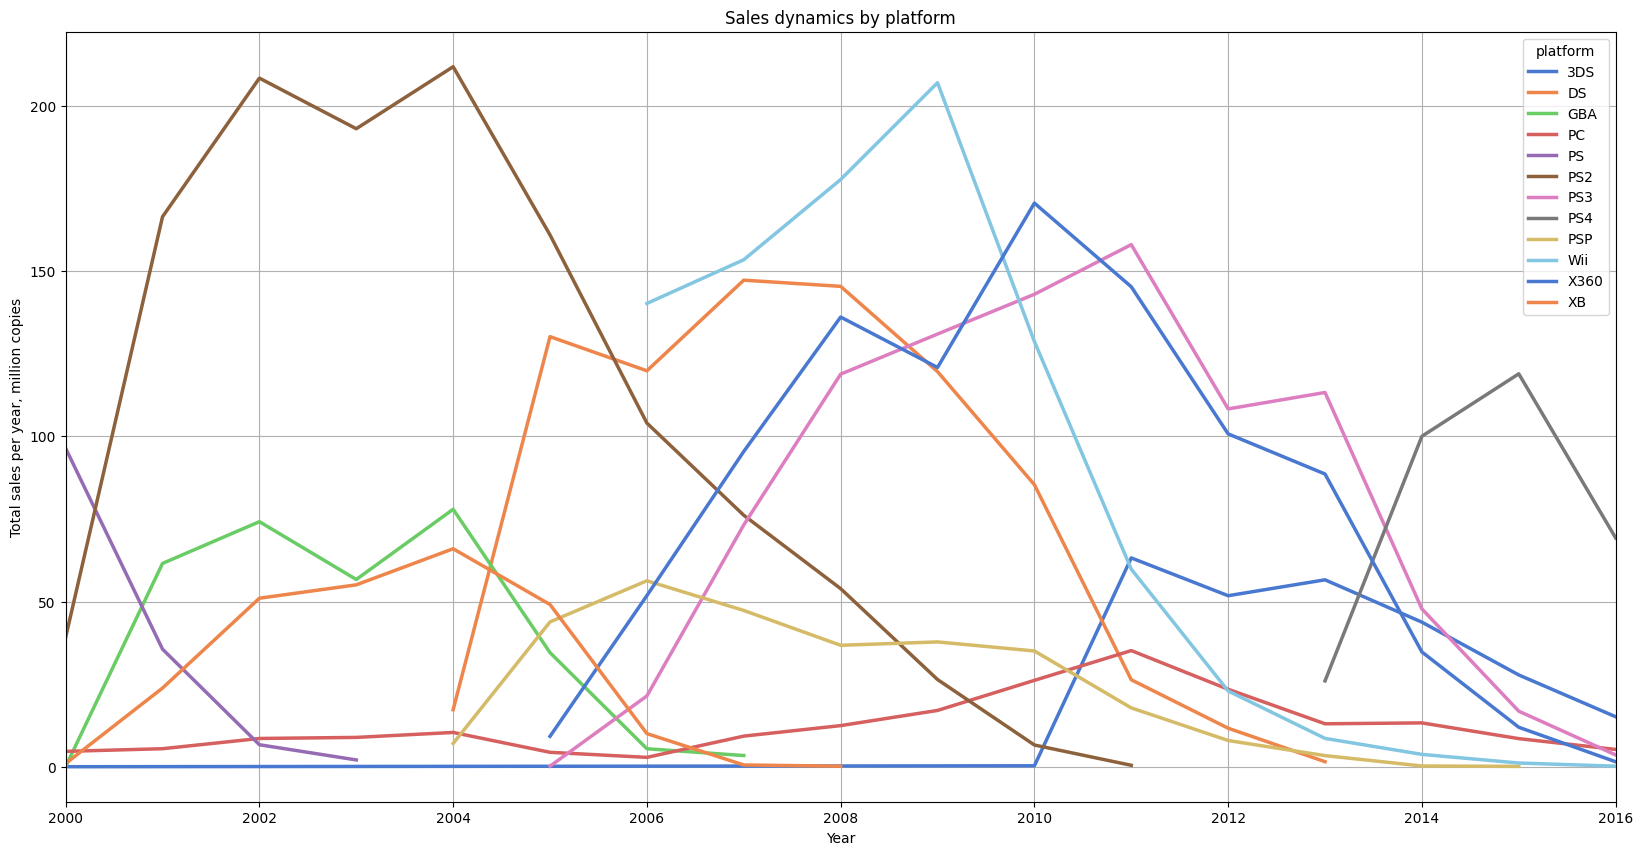

In [107]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(2000, 2016)
sns.lineplot(
    data=platform_sales[platform_sales['platform_total_sum'] > 254.5], 
    x="year_of_release", 
    y="sales_sum", 
    hue="platform", 
    palette="muted",
    linewidth=2.5,
    ax=ax
)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Total sales per year, million copies')
plt.title('Sales dynamics by platform')
print()

**It's hard to estimate platform lifespans from this graph, so let's align all platforms to their launch year.**

In [108]:
platform_sales.groupby('platform').first()['year_of_release']

platform
2600    1980
3DO     1994
3DS     2000
DC      1998
DS      2004
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PC      1985
PCFX    1996
PS      1994
PS2     2000
PS3     2005
PS4     2013
PSP     2004
PSV     2011
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii     2006
WiiU    2012
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: int32

In [109]:
platform_sales['year_difference'] = platform_sales['year_of_release'] - platform_sales['platform'].map(
platform_sales.groupby('platform').first()['year_of_release'])
platform_sales

,platform,year_of_release,sales_sum,platform_total_sum,year_difference
0,2600,1980,11.38,89.01,0
1,2600,1981,35.68,89.01,1
2,2600,1982,28.88,89.01,2
3,2600,1983,5.84,89.01,3
4,2600,1984,0.27,89.01,4
...,...,...,...,...,...
238,XB,2008,0.18,256.69,8
239,XOne,2013,18.96,159.32,0
240,XOne,2014,54.07,159.32,1
241,XOne,2015,60.14,159.32,2


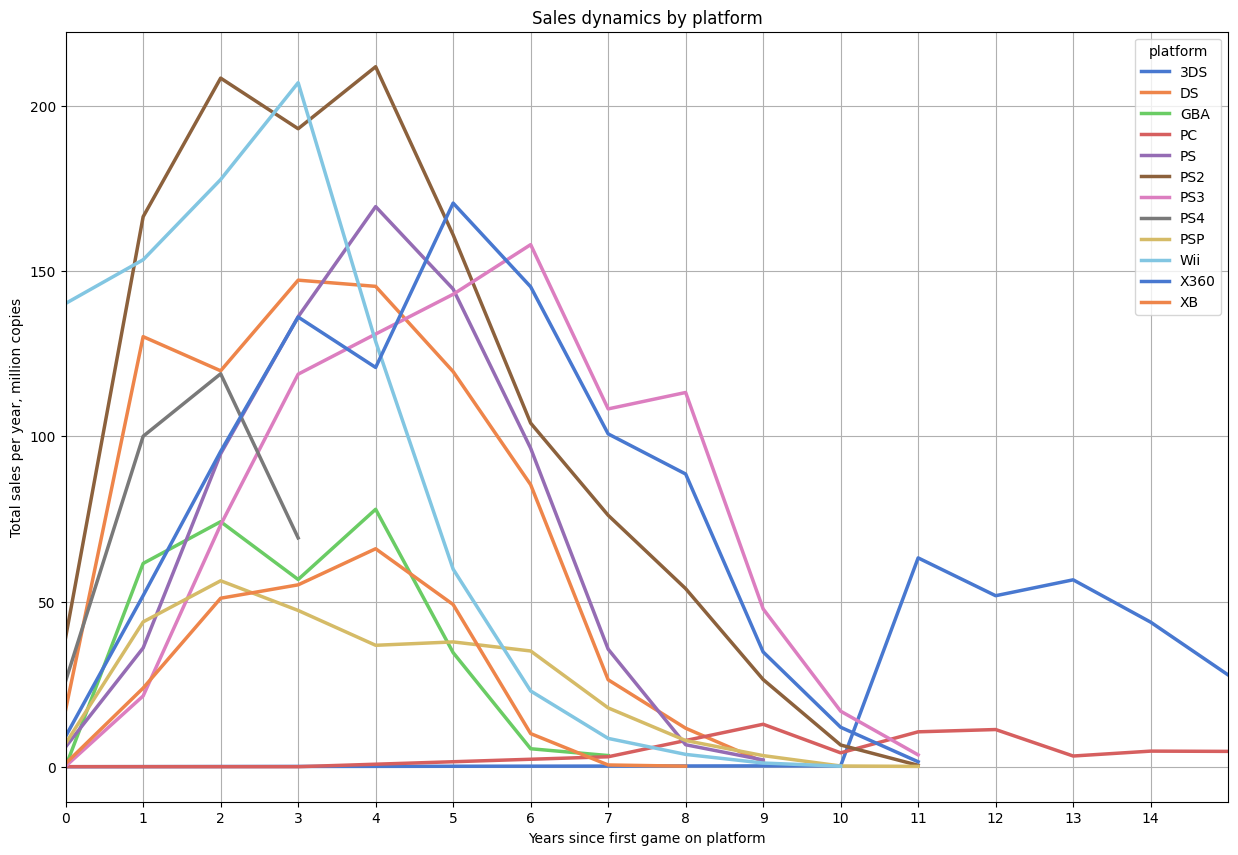

In [110]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlim(0, 15)
ax.set_xticks(range(15)) 
sns.lineplot(
    data=platform_sales[platform_sales['platform_total_sum'] > 254.5], 
    x="year_difference", 
    y="sales_sum", 
    hue="platform", 
    palette="muted",
    linewidth=2.5,
    ax=ax
)
plt.grid()
plt.xlabel('Years since first game on platform')
plt.ylabel('Total sales per year, million copies')
plt.title('Sales dynamics by platform')
print()

**Most platforms lose relevance after 6-7 years, with peak sales 1-2 years after launch. PC is an exception, as it is constantly updated.**

C:\Users\datre\AppData\Local\Temp\ipykernel_3688\709672341.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


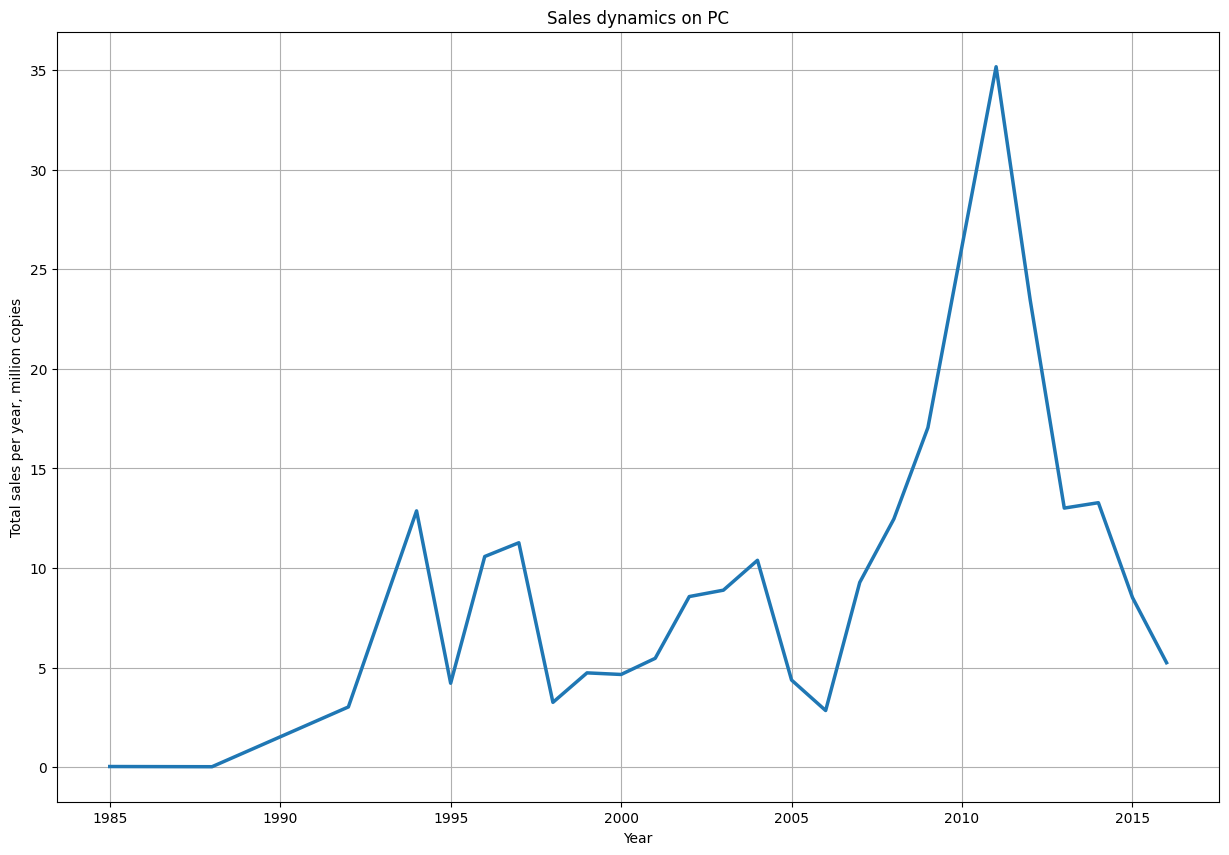

In [111]:
fig, ax = plt.subplots(figsize=(15, 10))
#ax.set_xlim(0, 30)
#ax.set_xticks(range(30)) 
sns.lineplot(
    data=platform_sales[platform_sales['platform'] == 'PC'], 
    x="year_of_release", 
    y="sales_sum",  
    palette="muted",
    linewidth=2.5,
    ax=ax
)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Total sales per year, million copies')
plt.title('Sales dynamics on PC')
print()

**PC game sales grew until 2011, possibly due to the rise of mobile/tablet gaming and piracy. PC remains a major market.**

#### Relevant period for 2017 forecast

**Since platforms become outdated in 6-7 years, let's use data from the last 5 years (2012-2016) for further analysis.**

In [112]:
df = df[df['year_of_release'] >= 2012]
platform_sales = platform_sales[platform_sales['year_of_release'] >= 2012]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### Analysis of potentially profitable platforms

In [113]:
platform_sales.head(10) #remove year_difference and update platform_total_sum for relevant period

,platform,year_of_release,sales_sum,platform_total_sum,year_difference
16,3DS,2012,51.76,258.53,12
17,3DS,2013,56.57,258.53,13
18,3DS,2014,43.76,258.53,14
19,3DS,2015,27.78,258.53,15
20,3DS,2016,15.14,258.53,16
37,DS,2012,11.67,804.28,8
38,DS,2013,1.54,804.28,9
118,PC,2012,23.45,258.86,27
119,PC,2013,13.01,258.86,28
120,PC,2014,13.28,258.86,29


*Remove year_difference and update platform_total_sum for relevant period*

In [114]:
platform_sales = platform_sales.drop(labels=['year_difference', 'platform_total_sum'], axis='columns')

In [115]:
platform_sales['platform_total_sum'] = platform_sales['platform'].map(platform_sales.groupby('platform')['sales_sum'].sum())
platform_sales.head(10)

,platform,year_of_release,sales_sum,platform_total_sum
16,3DS,2012,51.76,195.01
17,3DS,2013,56.57,195.01
18,3DS,2014,43.76,195.01
19,3DS,2015,27.78,195.01
20,3DS,2016,15.14,195.01
37,DS,2012,11.67,13.21
38,DS,2013,1.54,13.21
118,PC,2012,23.45,63.51
119,PC,2013,13.01,63.51
120,PC,2014,13.28,63.51


In [116]:
platform_sales.groupby('platform')['sales_sum'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
WiiU     82.19
PC       63.51
PSV      49.18
Wii      36.60
DS       13.21
PSP      11.69
Name: sales_sum, dtype: float64

**From 2012 to 2016, PS4 had the highest sales, followed by PS3 and Xbox360.**

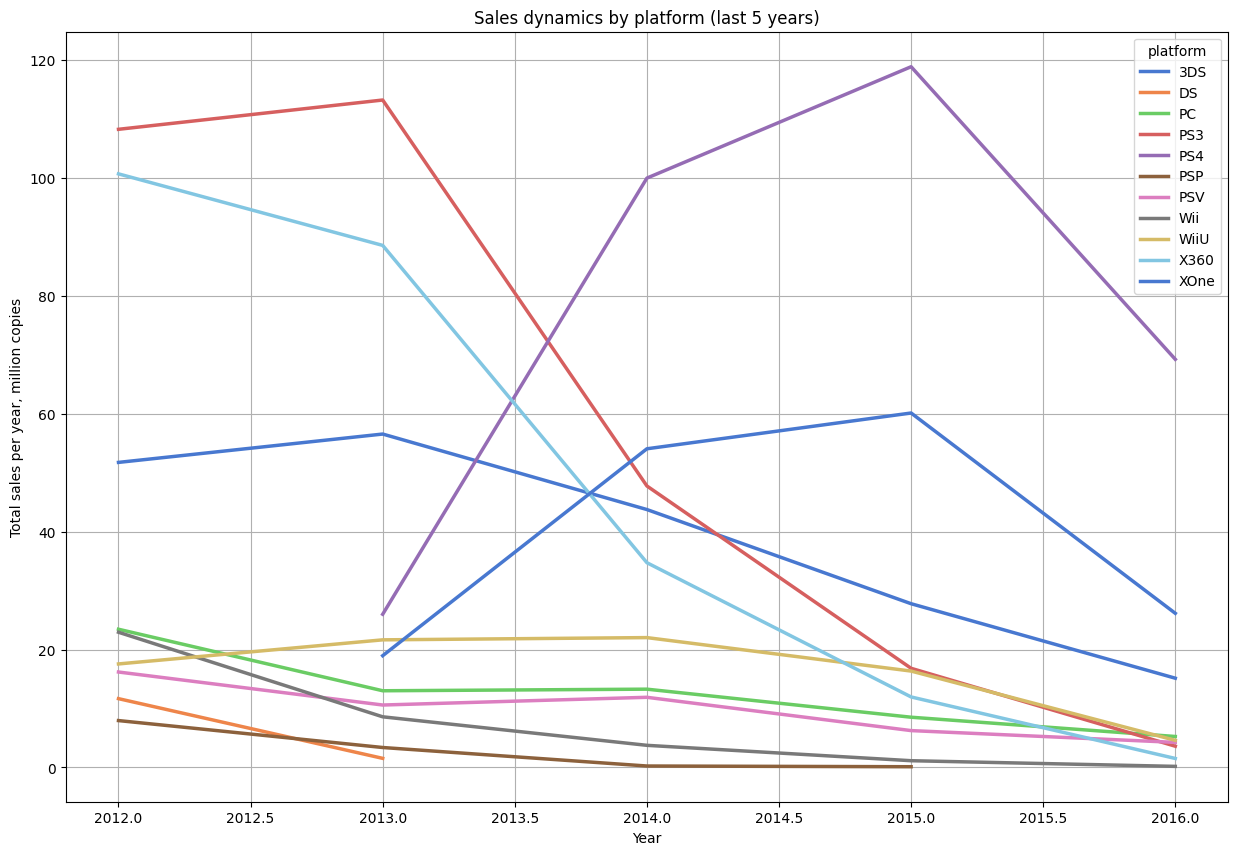

In [117]:
fig, ax = plt.subplots(figsize=(15, 10))
#ax.set_xlim(0, 30)
#ax.set_xticks(range(30)) 
sns.lineplot(
    data=platform_sales, 
    x="year_of_release", 
    y="sales_sum", 
    hue="platform", 
    palette="muted",
    linewidth=2.5,
    ax=ax
)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Total sales per year, million copies')
plt.title('Sales dynamics by platform (last 5 years)')
print()

**Sales for all platforms declined by 2016, but PS4 still leads. Xbox One and Nintendo 3DS are also strong.**

#### Boxplot of global sales

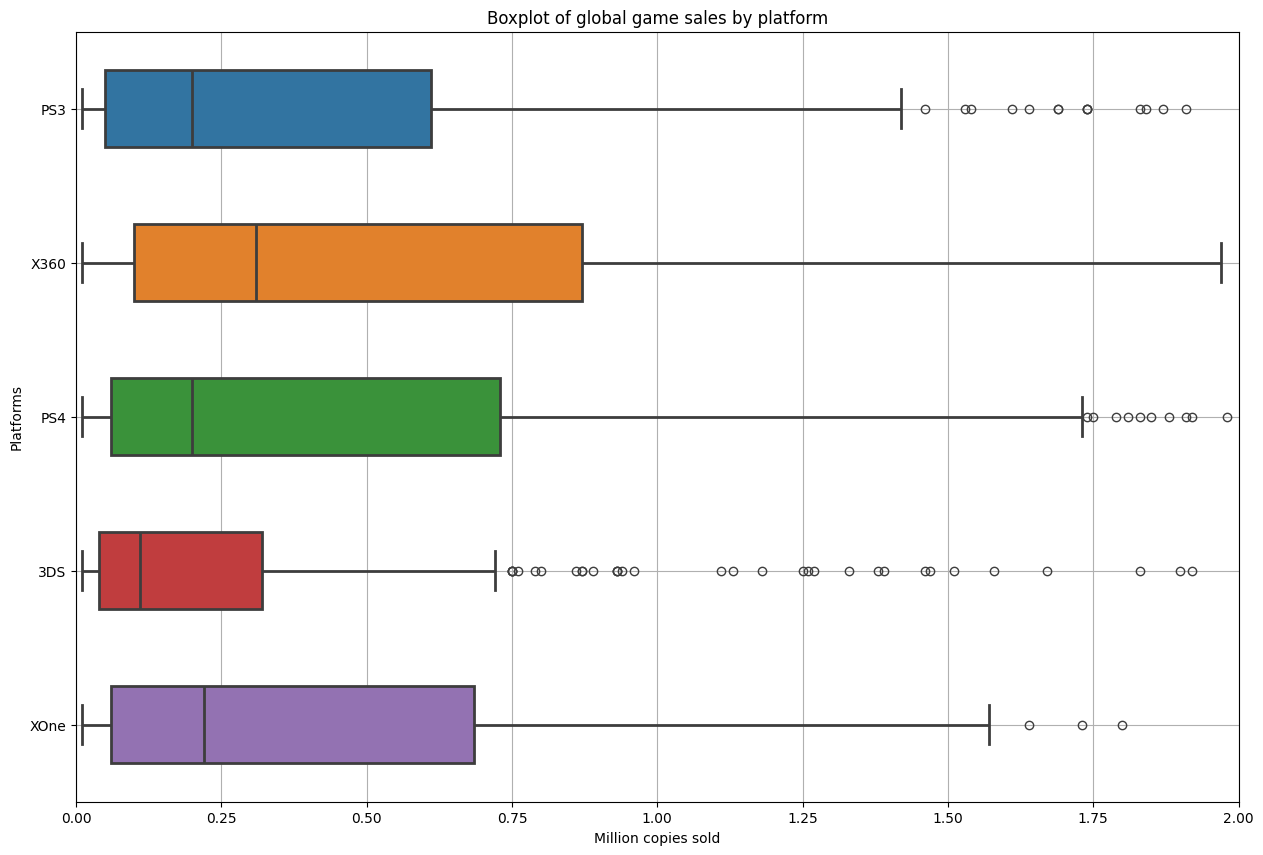

In [118]:
fig, ax = plt.subplots(figsize=(15, 10))
actual_platforms = ["PS4", "X360", "PS3", "3DS", "XOne"]
sns.boxplot(data=df[df["platform"].isin(actual_platforms)], 
            y="platform", 
            x="sales_sum", 
            hue="platform",
            dodge=False,
            linewidth=2,
            width = 0.5,
            ax=ax
            )
plt.xlim(0, 2)
plt.xlabel('Million copies sold')
plt.ylabel('Platforms')
plt.title('Boxplot of global game sales by platform')
plt.grid()

**Boxplot insights:** 
* Xbox360 has the highest median sales in the last 5 years
* PSP has the lowest median sales
* Nintendo 3DS has a low IQR and median, but many outliers (successful releases)
* PS3 and PS4 have similar medians, but PS4 has a higher upper quartile

#### Influence of user and critic reviews on sales 

**Let's analyze PS4.**

In [119]:
df_ps4 = df[df['platform'] == 'PS4']
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Correlation between sales_sum and critic_score: 0.4065679020617816


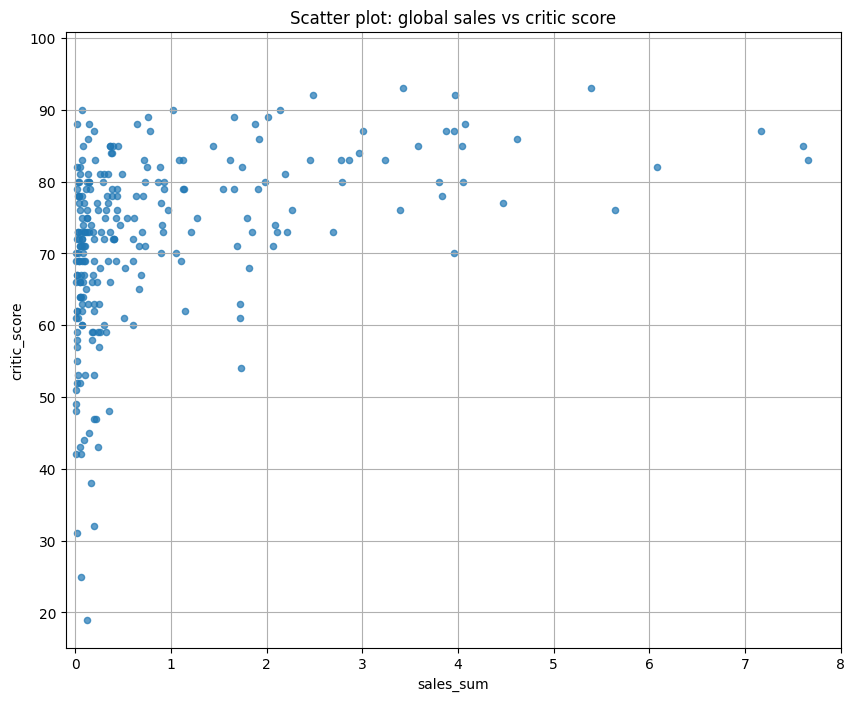

In [120]:
df_ps4.plot(
    x='sales_sum',
    y='critic_score',
    kind='scatter', 
    title='Scatter plot: global sales vs critic score',
    alpha=0.7,
    figsize=(10,8),
    xlim=(-0.1, 8),
    grid=True
)

print(f"Correlation between sales_sum and critic_score: {df_ps4['sales_sum'].corr(df_ps4['critic_score'])}")

**High critic scores do not guarantee high sales. Most games sell under 1 million copies regardless of rating. Games with over 1 million sales usually have a rating above 70. Correlation is weakly positive.**

Correlation between sales_sum and user_score: -0.03195711020455643


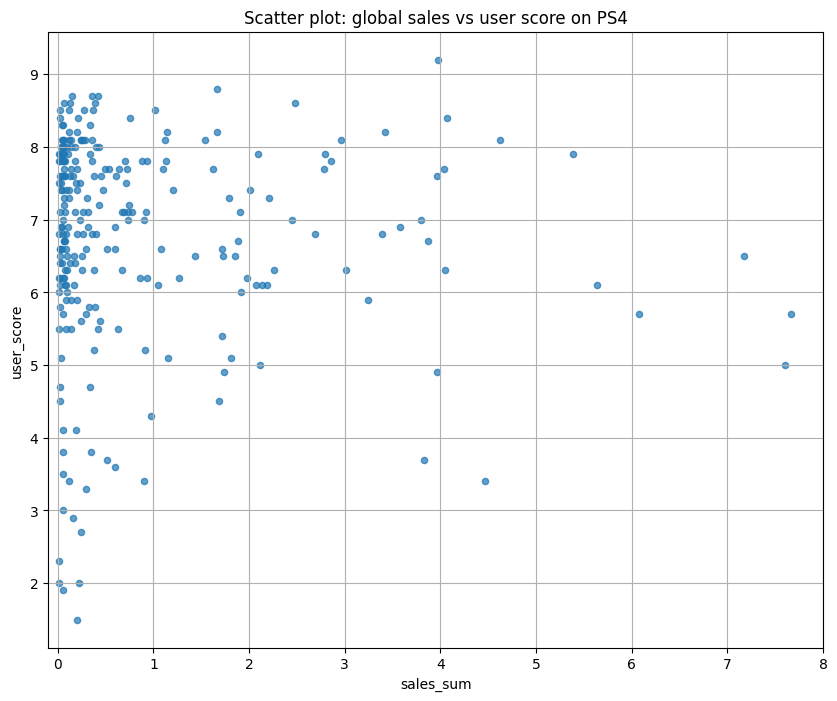

In [121]:
df_ps4.plot(
    x='sales_sum',
    y='user_score',
    kind='scatter', 
    title='Scatter plot: global sales vs user score on PS4',
    alpha=0.7,
    figsize=(10,8),
    xlim=(-0.1, 8),
    grid=True
)

print(f"Correlation between sales_sum and user_score: {df_ps4['sales_sum'].corr(df_ps4['user_score'])}")

**User ratings have more variance than critic ratings. Even successful games can have low user scores. Correlation is close to zero.**

**Let's check other platforms for generalization.**

In [122]:
df.groupby('platform')['critic_score'].count().sort_values(ascending=False)

platform
PS4     252
PS3     215
PC      203
X360    172
XOne    169
PSV     107
3DS     105
WiiU     90
Wii       6
DS        2
PSP       1
Name: critic_score, dtype: int64

In [123]:
df.groupby('platform')['user_score'].count().sort_values(ascending=False)

platform
PS3     284
PS4     257
X360    236
PC      211
XOne    182
PSV     130
3DS     115
WiiU    100
Wii      18
PSP       4
DS        3
Name: user_score, dtype: int64

**We'll exclude Wii, PSP, and DS from rating analysis due to too few reviews.**

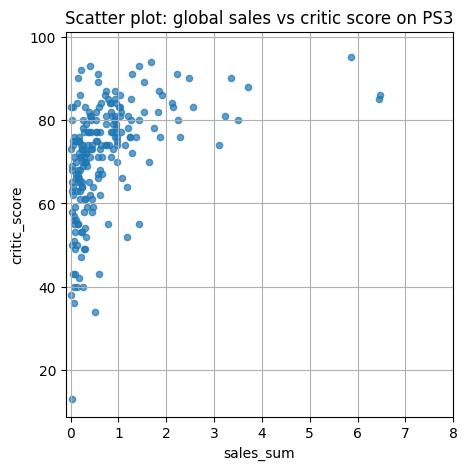

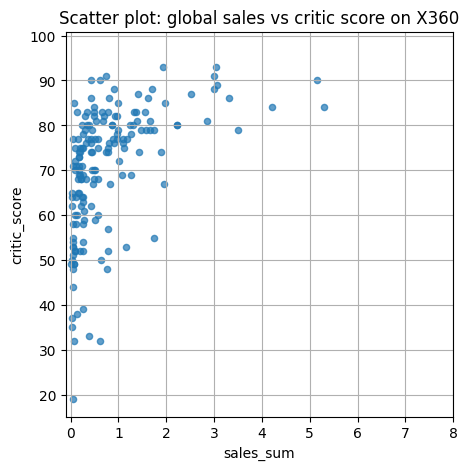

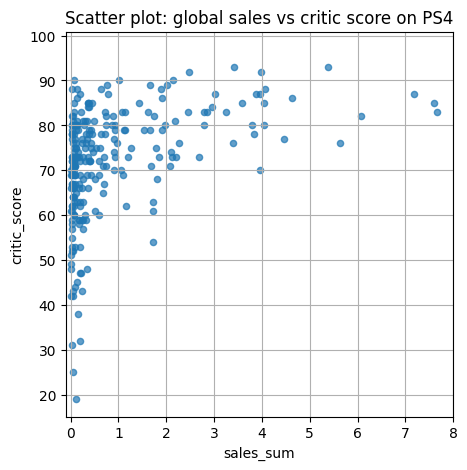

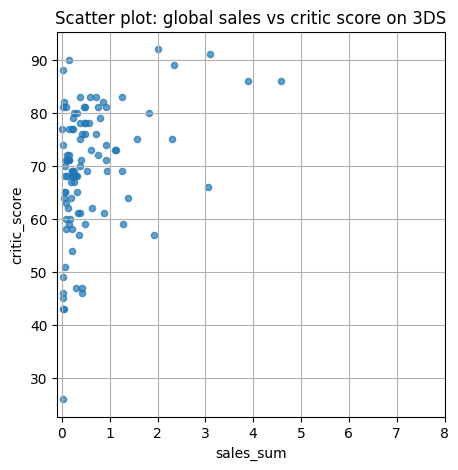

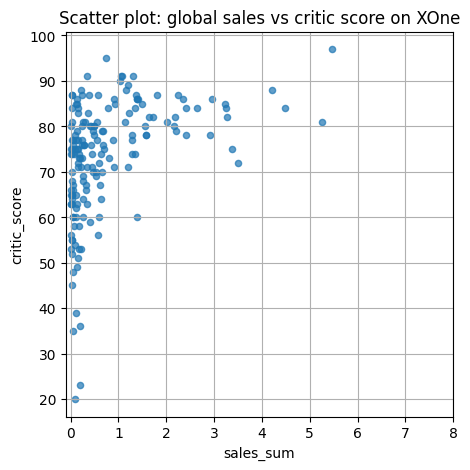

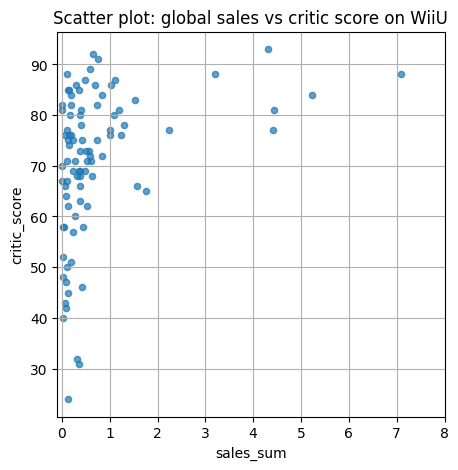

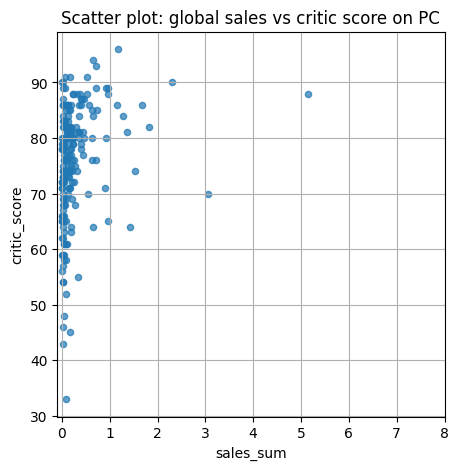

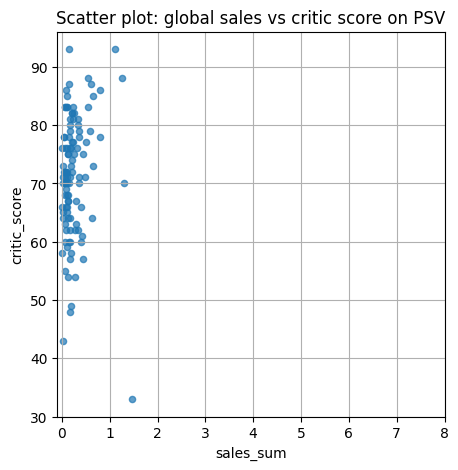

In [124]:
for platform in df['platform'].unique():
    if platform not in ['PSP', 'DS', 'Wii']:
        df[df['platform'] == platform].plot(
        x='sales_sum',
        y='critic_score',
        kind='scatter', 
        title=f'Scatter plot: global sales vs critic score on {platform}',
        alpha=0.7,
        figsize=(5,5),
        xlim=(-0.1, 8),
        grid=True
        )

XOne    0.416998
PS4     0.406568
X360    0.360266
WiiU    0.348380
PS3     0.331371
3DS     0.320458
PC      0.240570
PSV     0.094488
dtype: float64

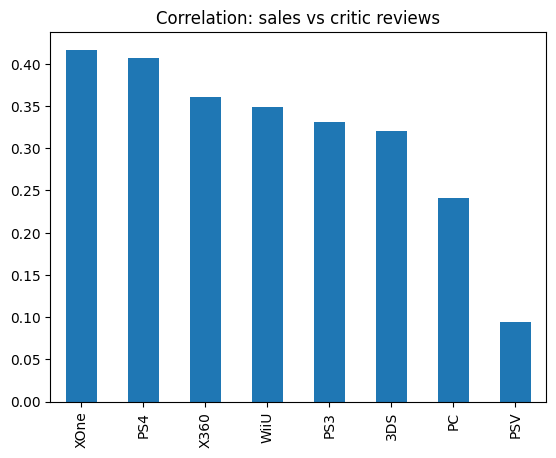

In [125]:
corr_arr = []
for platform in df['platform'].unique():
    if platform not in ['PSP', 'DS', 'Wii']:
        corr_arr.append((platform, 
                        df[df['platform'] == platform]['critic_score'].corr( df[df['platform'] == platform]['sales_sum'])))
idx, vals = zip(*corr_arr)
critic_corr_series = pd.Series(vals, idx)
critic_corr_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation: sales vs critic reviews')
critic_corr_series.sort_values(ascending=False)

**Sales are most correlated with critic reviews on Xbox One and PS4, least on PS Vita and PC.**

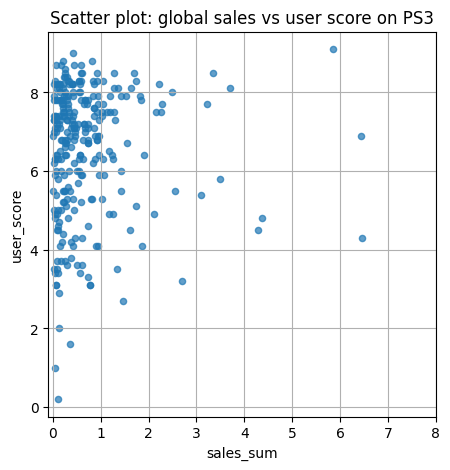

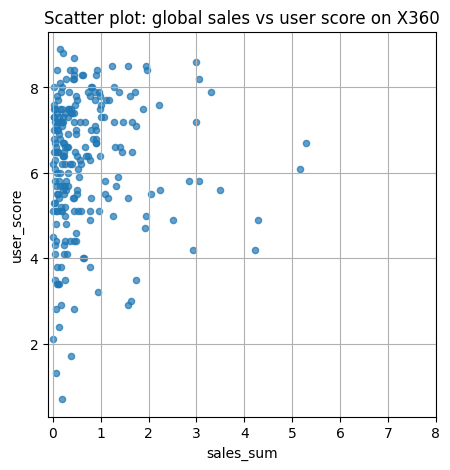

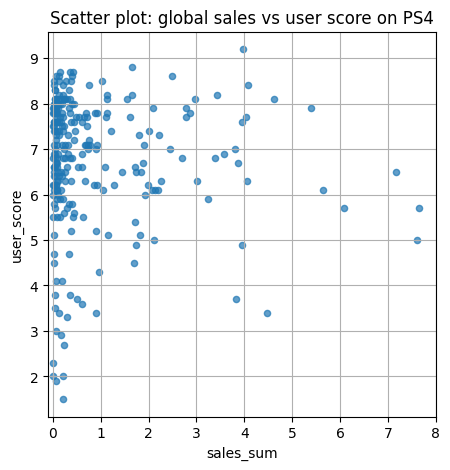

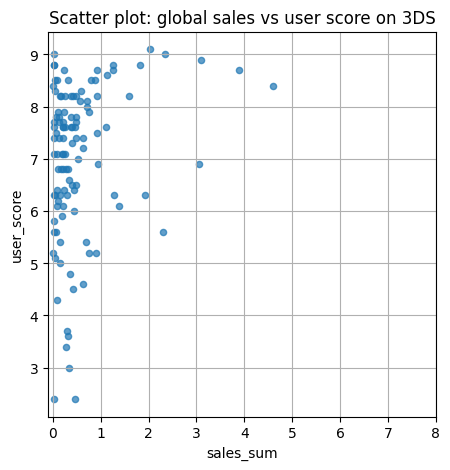

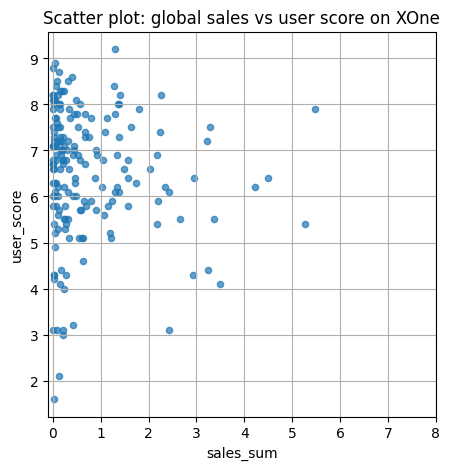

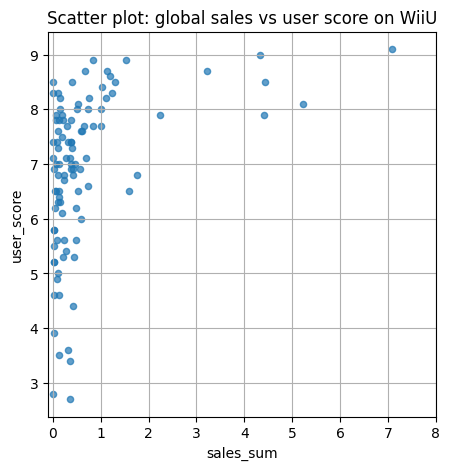

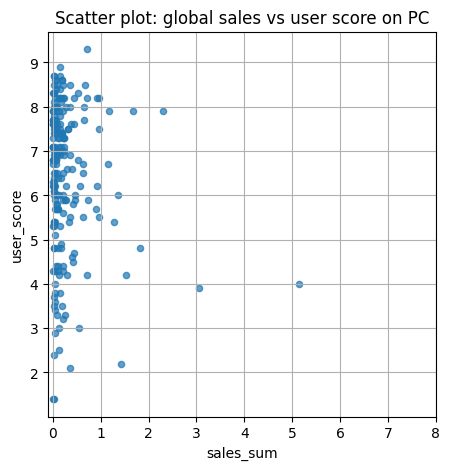

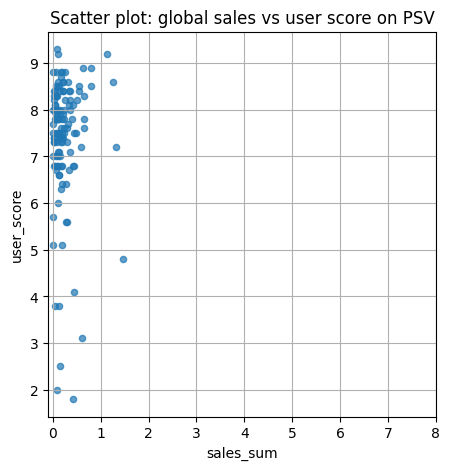

In [126]:
for platform in df['platform'].unique():
    if platform not in ['PSP', 'DS', 'Wii']:
        df[df['platform'] == platform].plot(
        x='sales_sum',
        y='user_score',
        kind='scatter', 
        title=f'Scatter plot: global sales vs user score on {platform}',
        alpha=0.7,
        figsize=(5,5),
        xlim=(-0.1, 8),
        grid=True
        )

WiiU    0.400219
3DS     0.198150
X360    0.006315
PSV    -0.004339
PS3    -0.005043
PS4    -0.031957
XOne   -0.068925
PC     -0.120339
dtype: float64

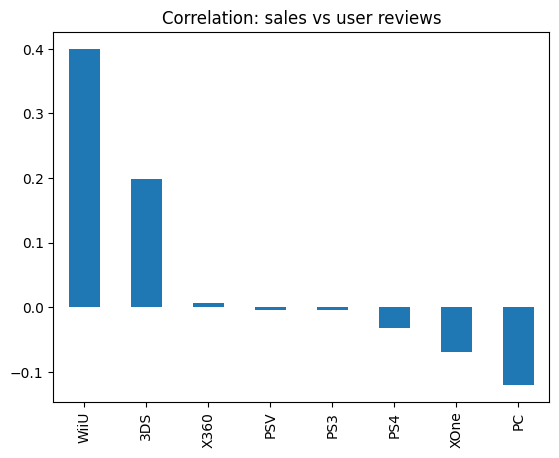

In [127]:
corr_arr = []
for platform in df['platform'].unique():
    if platform not in ['PSP', 'DS', 'Wii']:
        corr_arr.append((platform, 
                        df[df['platform'] == platform]['user_score'].corr( df[df['platform'] == platform]['sales_sum'])))
idx, vals = zip(*corr_arr)
user_corr_series = pd.Series(vals, idx)
user_corr_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation: sales vs user reviews')
user_corr_series.sort_values(ascending=False)

**Highest correlation with sales is for WiiU, close to zero for X360, PSV, and PS3, and slightly negative for PC, PS4, and Xbox.**

**Overall, critic ratings are more correlated with sales than user ratings.** 

#### Game genre distribution

genre
Action          1041
Role-Playing     370
Adventure        302
Sports           268
Shooter          237
Misc             193
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

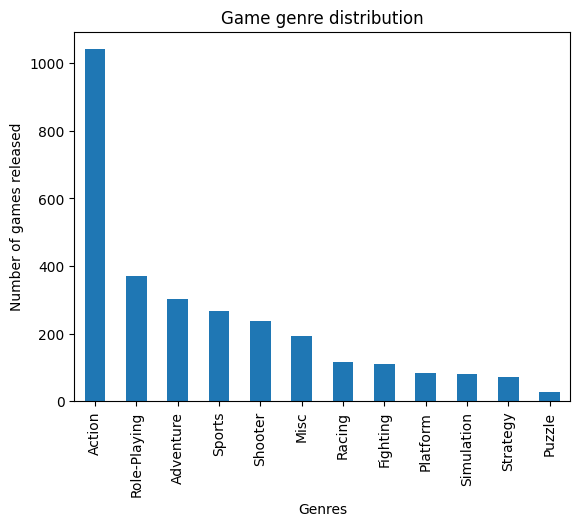

In [128]:
df.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of games released')
plt.title('Game genre distribution')
df.groupby('genre')['genre'].count().sort_values(ascending=False)

**Most games are action, least are puzzle.**

**Next, let's look at sales by genre**

genre
Action          446.41
Shooter         304.75
Role-Playing    192.80
Sports          181.07
Misc             85.28
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sales_sum, dtype: float64

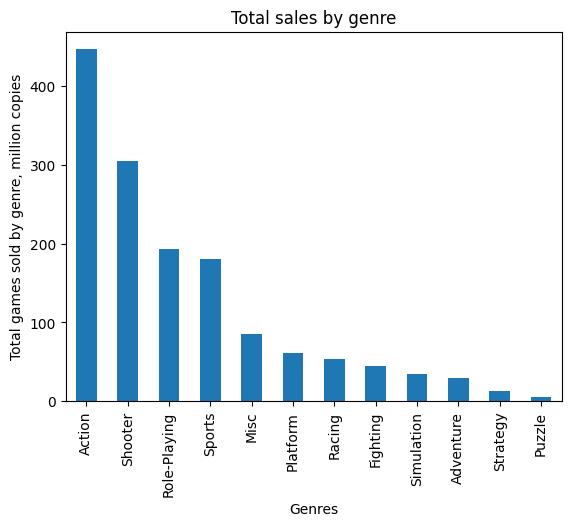

In [129]:
df.groupby('genre')['sales_sum'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Total games sold by genre, million copies')
plt.title('Total sales by genre')
df.groupby('genre')['sales_sum'].sum().sort_values(ascending=False)

**It's better to use average sales per game for each genre.**

genre
Shooter         1.285865
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.441865
Simulation      0.439000
Action          0.428828
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
dtype: float64

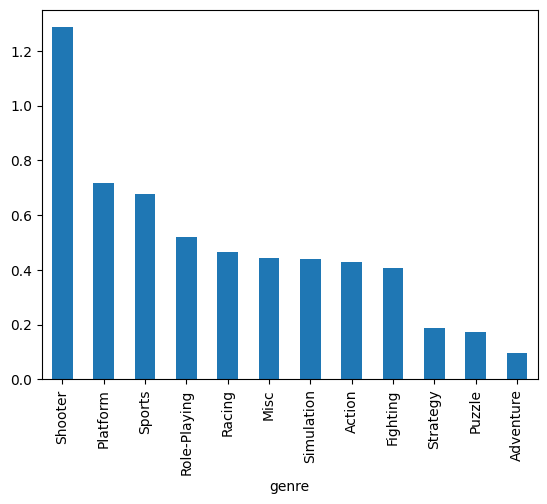

In [130]:
(
    (df.groupby('genre')['sales_sum'].sum()/
    df.groupby('genre')['genre'].count())
    .sort_values(ascending=False)
    .plot(kind='bar')
)
(
(df.groupby('genre')['sales_sum'].sum()/
    df.groupby('genre')['genre'].count())
    .sort_values(ascending=False)
)

**Shooters have the highest average sales per game (1.3 million), adventure the lowest.**

### User profiles by region

**Let's look at North America, Europe, and Japan.**

#### Most popular platforms

In [131]:
region_pivot = pd.pivot_table(df, index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
region_pivot

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.83,87.79,55.49
DS,3.78,3.72,4.93
PC,38.38,0.00,19.26
PS3,107.27,35.29,103.74
PS4,141.09,15.96,108.74
PSP,0.52,10.71,0.23
PSV,11.36,21.04,10.98
Wii,12.34,3.39,18.14
WiiU,25.13,13.01,38.10


platform
PS4     141.09
PS3     107.27
X360     74.89
XOne     51.59
3DS      42.83
PC       38.38
WiiU     25.13
Wii      12.34
PSV      11.36
DS        3.78
PSP       0.52
Name: eu_sales, dtype: float64

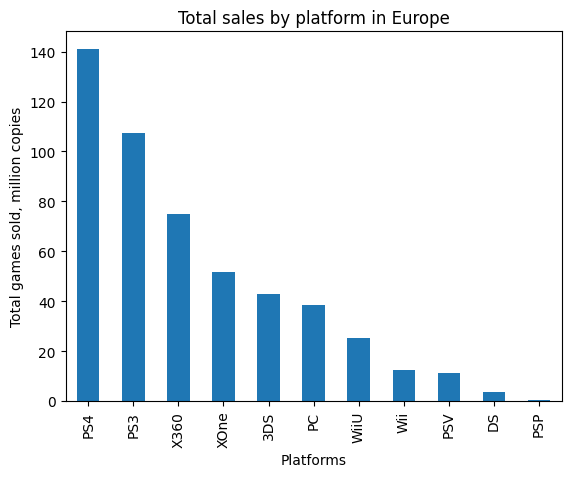

In [132]:
region_pivot['eu_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Platforms')
plt.ylabel('Total games sold, million copies')
plt.title('Total sales by platform in Europe')
region_pivot['eu_sales'].sort_values(ascending=False)

**Most popular platforms in Europe: PS4, PS3, Xbox360**

platform
X360    140.57
PS4     108.74
PS3     103.74
XOne     93.12
3DS      55.49
WiiU     38.10
PC       19.26
Wii      18.14
PSV      10.98
DS        4.93
PSP       0.23
Name: na_sales, dtype: float64

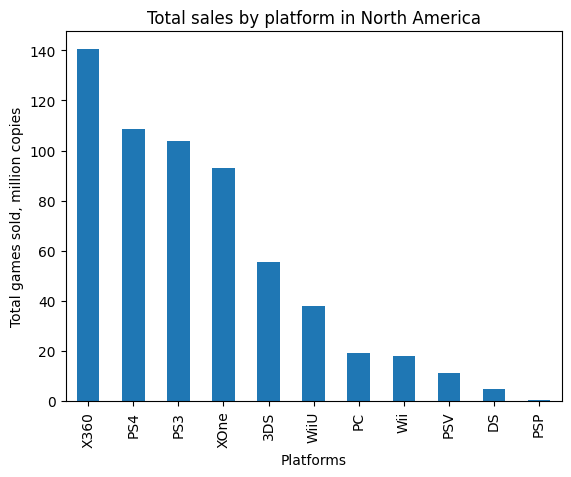

In [133]:
region_pivot['na_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Platforms')
plt.ylabel('Total games sold, million copies')
plt.title('Total sales by platform in North America')
region_pivot['na_sales'].sort_values(ascending=False)

**Most popular platforms in North America: Xbox360, PS4, PS3. Xbox360 leads, even though it's older than PS4.**

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.71
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

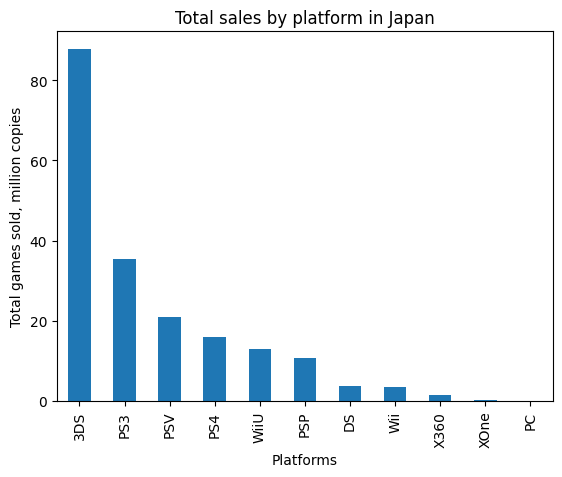

In [134]:
region_pivot['jp_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Platforms')
plt.ylabel('Total games sold, million copies')
plt.title('Total sales by platform in Japan')
region_pivot['jp_sales'].sort_values(ascending=False)

**In Japan, Nintendo 3DS leads by a large margin. Portable consoles are popular in Japan, and there's a large internal market.**

#### Most popular genres

In [135]:
genre_pivot = pd.pivot_table(df, index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
genre_pivot

,eu_sales,jp_sales,na_sales
genre,,,
Action,161.70,52.80,180.15
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,13.10,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.79


genre
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

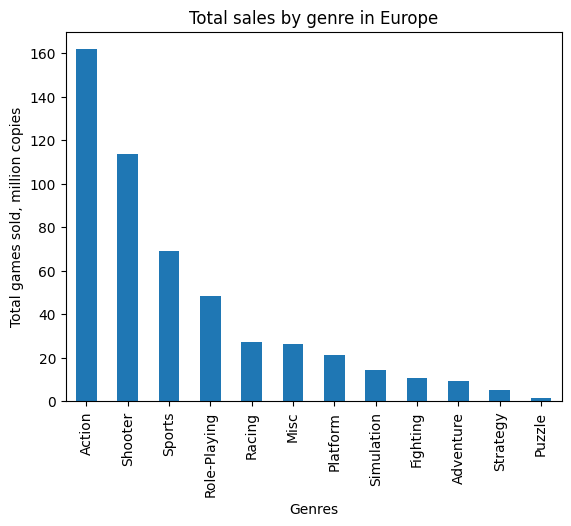

In [136]:
genre_pivot['eu_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Total games sold, million copies')
plt.title('Total sales by genre in Europe')
genre_pivot['eu_sales'].sort_values(ascending=False)

**Top 3 genres in Europe: action, shooter, sports.**

genre
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

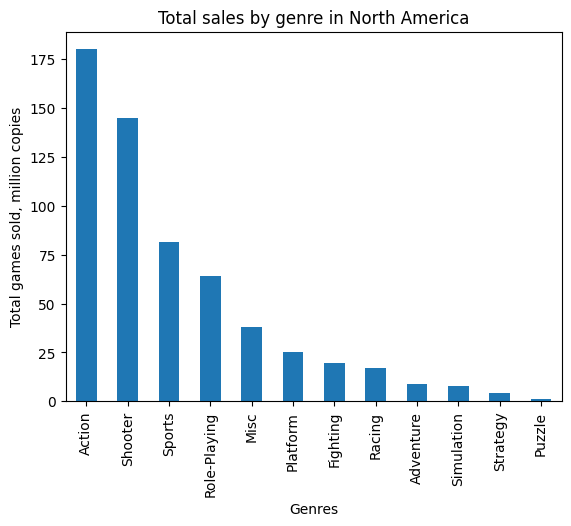

In [137]:
genre_pivot['na_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Total games sold, million copies')
plt.title('Total sales by genre in North America')
genre_pivot['na_sales'].sort_values(ascending=False)

**Top 3 genres in North America: action, shooter, sports.**

genre
Role-Playing    65.44
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Racing           2.50
Puzzle           2.14
Name: jp_sales, dtype: float64

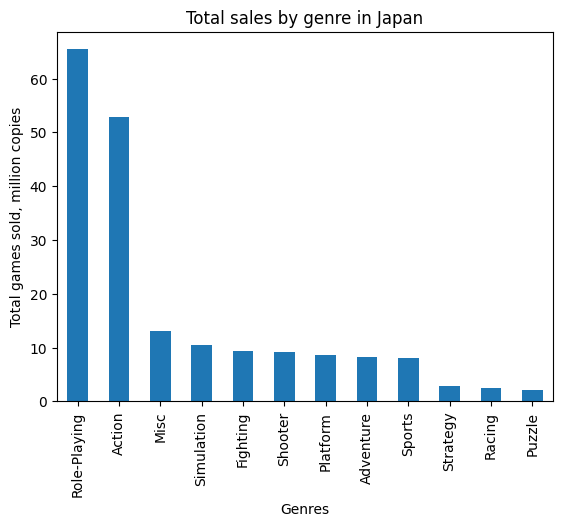

In [138]:
genre_pivot['jp_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Total games sold, million copies')
plt.title('Total sales by genre in Japan')
genre_pivot['jp_sales'].sort_values(ascending=False)

**In Japan, RPGs are most popular, followed by action. Other genres have much lower sales.**

#### ESRB rating influence by region

In [139]:
rating_pivot = pd.pivot_table(df, index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
rating_pivot

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,57.25,8.19,77.93
M,194.44,21.20,231.67
T,52.96,26.02,66.02


*Rating categories:*
* **E** - for everyone, minimal cartoon violence
* **E10+** - for ages 10+, more cartoon violence, mild language, minimal blood
* **T** - for teens 13+, may contain violence, crude humor, mild sexual content, infrequent strong language
* **M** - for mature 17+, may contain intense violence, blood, sexual content, strong language

rating
M       194.44
E       113.03
E10+     57.25
T        52.96
Name: eu_sales, dtype: float64

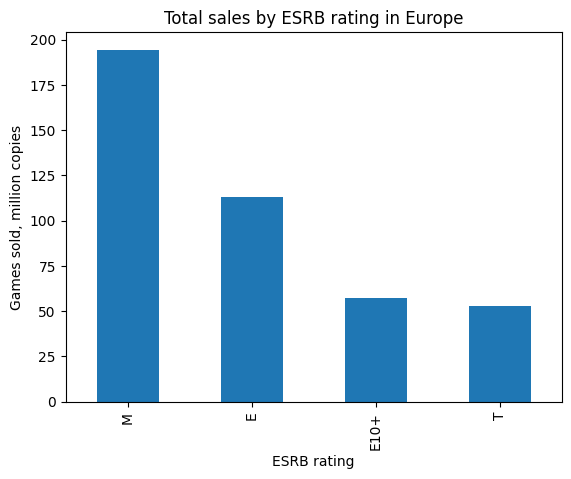

In [140]:
rating_pivot['eu_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('ESRB rating')
plt.ylabel('Games sold, million copies')
plt.title('Total sales by ESRB rating in Europe')
rating_pivot['eu_sales'].sort_values(ascending=False)

**In Europe, mature-rated games are most popular, which matches the popularity of shooters and action games.**

rating
M       231.67
E       114.37
E10+     77.93
T        66.02
Name: na_sales, dtype: float64

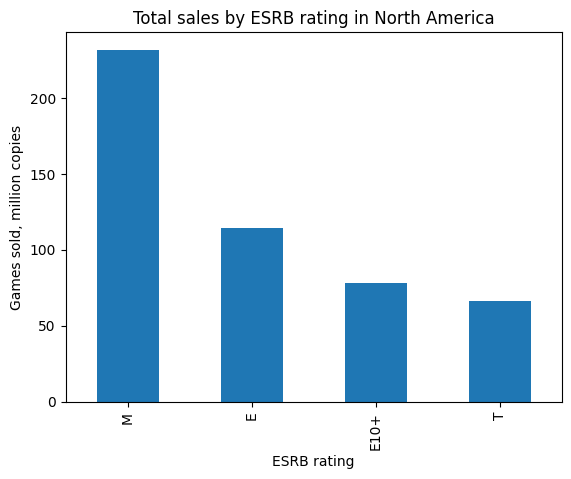

In [141]:
rating_pivot['na_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('ESRB rating')
plt.ylabel('Games sold, million copies')
plt.title('Total sales by ESRB rating in North America')
rating_pivot['na_sales'].sort_values(ascending=False)

**North America has a similar pattern to Europe, with mature-rated games being most popular.**

rating
E       28.33
T       26.02
M       21.20
E10+     8.19
Name: jp_sales, dtype: float64

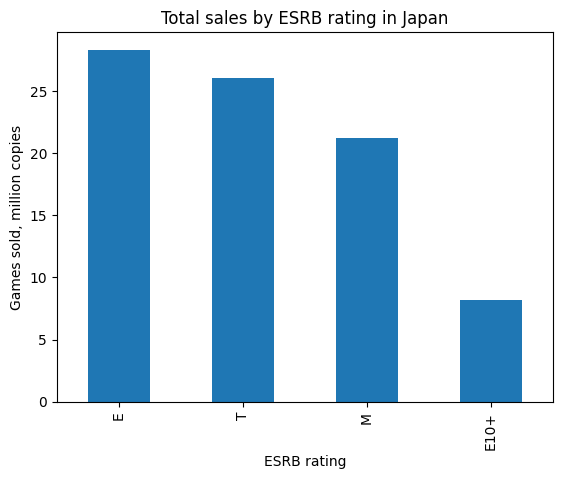

In [142]:
rating_pivot['jp_sales'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('ESRB rating')
plt.ylabel('Games sold, million copies')
plt.title('Total sales by ESRB rating in Japan')
rating_pivot['jp_sales'].sort_values(ascending=False)

**In Japan, E (everyone) and T (teen) ratings are most popular, with mature-rated games in third place.**

**User profiles by region:**
* **Europe:** PS4 user, likes shooters (e.g. Borderlands), prefers mature-rated games
* **North America:** PS4 user (Xbox360 is outdated by 2017), likes shooters, similar to Europe
* **Japan:** Nintendo DS user (Nintendo Switch releases in 2017), likes RPGs, prefers E-rated games

### Statistical hypothesis testing

#### Mean user ratings for Xbox One and PC are equal

**We'll compare mean user ratings for all games on these platforms. First, compare sample variances for a two-sample t-test.** 

In [143]:
df.query('platform == "XOne"')['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [144]:
df.query('platform == "PC"')['user_score'].describe()

count    211.000000
mean       6.445498
std        1.657455
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

**Standard deviations are similar, so we can use a two-sample t-test with equal variance.**

**Hypotheses:**
* Null hypothesis (**H0**): mean user ratings for XOne and PC are equal
* Alternative hypothesis (**H1**): means are not equal (two-sided)

Using scipy.stats.ttest_ind(array1, array2, equal_var, 'two-sided')

In [145]:
alpha = 0.05# significance level 5%
results = st.ttest_ind(df.query('platform == "XOne"')['user_score'].dropna(),
                       df.query('platform == "PC"')['user_score'].dropna(),
                       alternative='two-sided') #two-sample t-test
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

p-value: 0.6252774522173157
Failed to reject null hypothesis


**p-value is 0.55, so we fail to reject the null hypothesis of equal means.**

#### Mean user ratings for Action and Sports genres are different

**We'll compare mean user ratings for Action and Sports genres. First, check sample sizes and variances.**

In [146]:
df.query('genre == "Action"')['user_score'].describe()

count    531.000000
mean       6.834275
std        1.371830
min        1.600000
25%        6.250000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [147]:
df.query('genre == "Sports"')['user_score'].describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

**Variances and sizes are suitable for a two-sample t-test with equal variance.**

**Hypotheses:**
* Null hypothesis (**H0**): mean user ratings for Action and Sports are equal
* Alternative hypothesis (**H1**): means are not equal (two-sided)

Using scipy.stats.ttest_ind(array1, array2, equal_var, 'two-sided')

In [148]:
alpha = 0.05# significance level 5%
results = st.ttest_ind(df.query('genre == "Action"')['user_score'].dropna(),
                       df.query('genre == "Sports"')['user_score'].dropna(),
                       alternative='two-sided') #two-sample t-test
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

p-value: 1.1405639632267918e-26
Reject null hypothesis


**p-value is very close to zero, so we reject the null hypothesis. Mean user ratings for Action and Sports are different.**


### Conclusion

**Project goal: process video game sales data and identify patterns that determine a game's success.**

1. Data preprocessing:
    * Columns Name, Year_of_Release, Critic_Score, User_Score, Rating had missing values. Rows without names were dropped. Missing years were filled with the mode for each game across platforms, others dropped. Missing user/critic scores and ratings were left as is.
    * Added a column for total sales (sales_sum)
    
2. Exploratory analysis:
    * Most platforms lose relevance after 6-7 years, with peak sales 1-2 years after launch. PC is an exception.
    * PC sales grew until 2011, possibly due to mobile/tablet gaming and piracy. PC remains a major market.
    * For analysis, we used data from 2012-2016.
    * PS4 had the highest sales in this period, followed by PS3 and Xbox360.
    * Sales declined by 2016, but PS4 still leads. Xbox One and Nintendo 3DS are also strong.
    * Boxplots show Xbox360 has the highest median sales, PSP the lowest, 3DS has many outliers, PS3/PS4 have similar medians but PS4 has a higher upper quartile.
    * High critic scores do not guarantee high sales. Correlation is weakly positive.
    * User ratings have more variance, correlation is close to zero.
    * Most games are action, least are puzzle.
    * Shooters have the highest average sales per game, adventure the lowest.
    
3. Regional preferences:
    * Europe: PS4, PS3, Xbox360 are most popular
    * North America: Xbox360, PS4, PS3
    * Japan: Nintendo 3DS leads, portable consoles are popular
    * Top genres in Europe/NA: action, shooter, sports
    * Japan: RPGs are most popular
    * Europe/NA: mature-rated games are most popular
    * Japan: E and T ratings are most popular
    * User profiles:
        * Europe: PS4 user, likes shooters, mature-rated games
        * North America: PS4 user, likes shooters, similar to Europe
        * Japan: Nintendo DS user, likes RPGs, E-rated games
        
4. Hypothesis testing:
    * Failed to reject the hypothesis that mean user ratings for Xbox One and PC are equal
    * Mean user ratings for Action and Sports are different

**A potentially successful game:**

**Released on PS4 or Xbox One for the West, or Nintendo 3DS for Japan, with a critic score above 7, in the action/shooter genre for the West or RPG for Japan.**